In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df_train=pd.read_csv("train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df1_test=pd.read_csv('test.csv')
df1_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df1_test.iloc[-1]

PassengerId                        1309
Pclass                                3
Name           Peter, Master. Michael J
Sex                                male
Age                                 NaN
SibSp                                 1
Parch                                 1
Ticket                             2668
Fare                            22.3583
Cabin                               NaN
Embarked                              C
Name: 417, dtype: object

###  HERE IN THE DATA WE SEE THE SEX IS 'MALE' OR 'FEMALE' SO WE HAVE TO ENCODE IT AS 
# MALE=1, FEMALE=0

In [5]:
#INTRODUCTION OF DUMMY VARIABLE IN EMBARKED COLUMN

In [6]:
just_dummy=pd.get_dummies(df_train['Embarked'])
just_dummy.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [7]:
step_1=pd.concat([df_train,just_dummy],axis=1)
step_1.drop(['Embarked','Q'],inplace=True,axis=1)
step_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,1,0


In [8]:
just_dummy1=pd.get_dummies(df1_test['Embarked'])
just_dummy1.head()

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [9]:
step_1_test=pd.concat([df1_test,just_dummy1],axis=1)
step_1_test.drop(['Embarked','Q'],inplace=True,axis=1)
step_1_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,1,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,0,1


In [10]:
import sklearn

from sklearn.preprocessing import LabelEncoder

In [11]:
le_Sex=LabelEncoder()
le_Embarked=LabelEncoder()

In [12]:
step_1['Sex_n']=le_Sex.fit_transform(step_1['Sex'])
step_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,S,Sex_n
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,1,1


In [13]:
step_1_test['Sex_n']=le_Sex.fit_transform(step_1_test['Sex'])
step_1_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,S,Sex_n
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,0,1,0


In [14]:
#STRUCTURE DATA FRAME BY DROPPING THE SEX CATEGORICAL VARIABLE

In [15]:
df1_test_new=step_1_test.drop(['Sex'],axis='columns')
df1_test_new

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,C,S,Sex_n
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,0,0,1
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",NaN,0,0,A.5. 3236,8.0500,NaN,0,1,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,1,1
416,1308,3,"Ware, Mr. Frederick",NaN,0,0,359309,8.0500,NaN,0,1,1


In [16]:
df_train_new=step_1.drop(['Sex'],axis='columns')
df_train_new.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,C,S,Sex_n
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,1


### VISUALIZING THE MISSING DATA OF THE RESPECTIVE COLUMNS (YELLOW COLOUR SHOWS THE MISSING COLUMN)

In [17]:
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

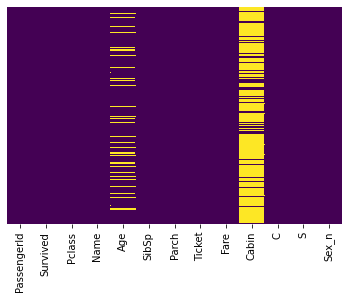

In [18]:
sns.heatmap(df_train_new.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

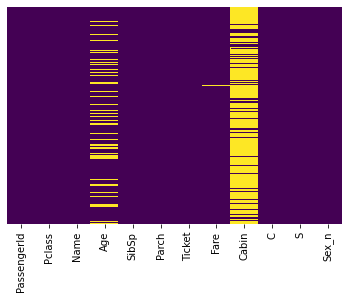

In [19]:
sns.heatmap(df1_test_new.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### NOW FILLING THE MISSING VALUE PRESENT IN THE 'AGE','FARE' COLUMNS AND DROP OUT THE 'CABIN' COLUMN BECAUSE LARGE NUMBER OF MISSING VALUE PRESENT IN IT

In [20]:
#FILLING THE MISSING VALUE IN AGE AND FARE BY ITS COLUMN MEANS

In [21]:
df_train_new['Age'].fillna(value=df_train_new['Age'].mean(),inplace=True)

In [22]:
df1_test_new['Age'].fillna(value=df1_test_new['Age'].mean(),inplace=True)
df1_test_new['Fare'].fillna(value=df1_test_new['Fare'].mean(),inplace=True)

In [23]:
#DROP OUT THE CABIN COLUMN ON BOTH TEST AND TRAIN DATA

In [24]:
Model_train_data=df_train_new.drop(['Ticket','Cabin','Name'],axis='columns')
Model_train_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Sex_n
0,1,0,3,22.000000,1,0,7.2500,0,1,1
1,2,1,1,38.000000,1,0,71.2833,1,0,0
2,3,1,3,26.000000,0,0,7.9250,0,1,0
3,4,1,1,35.000000,1,0,53.1000,0,1,0
4,5,0,3,35.000000,0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0,1,1
887,888,1,1,19.000000,0,0,30.0000,0,1,0
888,889,0,3,29.699118,1,2,23.4500,0,1,0
889,890,1,1,26.000000,0,0,30.0000,1,0,1


In [25]:
Model_test_data=df1_test_new.drop(['Ticket','Cabin','Name'],axis='columns')
Model_test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Sex_n
0,892,3,34.50000,0,0,7.8292,0,0,1
1,893,3,47.00000,1,0,7.0000,0,1,0
2,894,2,62.00000,0,0,9.6875,0,0,1
3,895,3,27.00000,0,0,8.6625,0,1,1
4,896,3,22.00000,1,1,12.2875,0,1,0
...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0,1,1
414,1306,1,39.00000,0,0,108.9000,1,0,0
415,1307,3,38.50000,0,0,7.2500,0,1,1
416,1308,3,30.27259,0,0,8.0500,0,1,1


In [26]:
#Now we see in the graph that no any missing value present in the respective columns

<AxesSubplot:>

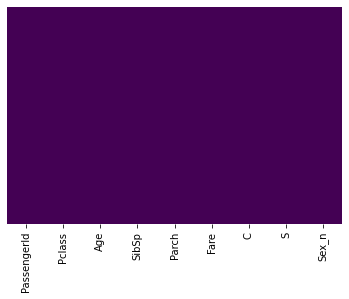

In [27]:
sns.heatmap(Model_test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

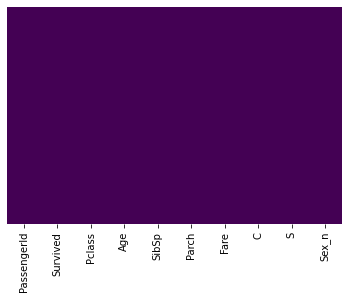

In [28]:
sns.heatmap(Model_train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## SCATTER PLOT OF THE DIFFERENT INDEPENDENT VARIABLES W.R.T DEPENDENT VARIABLE

Text(0.5, 1.0, 'logistic plot')

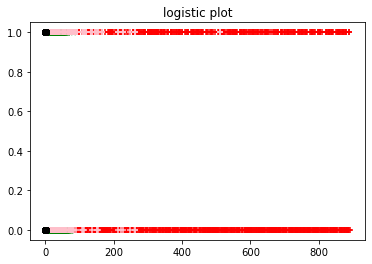

In [29]:
plt.figure()
plt.scatter(Model_train_data['PassengerId'],Model_train_data['Survived'],marker='+',color='red')
plt.scatter(Model_train_data['Pclass'],Model_train_data['Survived'],marker='*',color='BLUE')
plt.scatter(Model_train_data['Age'],Model_train_data['Survived'],marker='*',color='GREEN')
plt.scatter(Model_train_data['SibSp'],Model_train_data['Survived'],marker='+',color='YELLOW')
plt.scatter(Model_train_data['Parch'],Model_train_data['Survived'],marker='+',color='PURPLE')
plt.scatter(Model_train_data['Fare'],Model_train_data['Survived'],marker='+',color='PINK')
plt.scatter(Model_train_data['C'],Model_train_data['Survived'],marker='+',color='grey')
plt.scatter(Model_train_data['S'],Model_train_data['Survived'],marker='+',color='PINK')
plt.scatter(Model_train_data['Sex_n'],Model_train_data['Survived'],color='BLACK')
plt.title('logistic plot')

### FITTING THE MODEL

In [30]:
x_train=Model_train_data[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Sex_n','C','S']]
y_train=Model_train_data['Survived']

In [31]:
x_test=Model_test_data[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Sex_n','C','S']]
x_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_n,C,S
0,892,3,34.50000,0,0,7.8292,1,0,0
1,893,3,47.00000,1,0,7.0000,0,0,1
2,894,2,62.00000,0,0,9.6875,1,0,0
3,895,3,27.00000,0,0,8.6625,1,0,1
4,896,3,22.00000,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,1,0,1
414,1306,1,39.00000,0,0,108.9000,0,1,0
415,1307,3,38.50000,0,0,7.2500,1,0,1
416,1308,3,30.27259,0,0,8.0500,1,0,1


In [32]:
x1_train=sm.add_constant(x_train)
logit_model=sm.Logit(y_train,x1_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.440251
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      881
Method:                           MLE   Df Model:                            9
Date:                Sat, 14 Aug 2021   Pseudo R-squ.:                  0.3389
Time:                        16:12:23   Log-Likelihood:                -392.26
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.815e-81
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.2354      0.664      7.880      0.000       3.933       6.538
PassengerId  9.386e-05    

### DESCRIBING THE STATISTICAL ANALYSIS OF THE GIVEN DATA

In [33]:
Model_train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Sex_n
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.188552,0.722783,0.647587
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.391372,0.447876,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [34]:
Model_test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Sex_n
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.244019,0.645933,0.636364
std,120.810458,0.841838,12.634534,0.896760,0.981429,55.840500,0.430019,0.478803,0.481622
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,1100.500000,3.000000,30.272590,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000,0.000000,1.000000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000


In [35]:
Model_test_data['Pclass'].unique()

array([3, 2, 1], dtype=int64)

In [36]:
Model_train_data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [37]:
Model_test_data['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [38]:
Model_train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [39]:
Model_test_data['SibSp'].unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

In [40]:
Model_train_data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [41]:
Model_test_data['SibSp'].value_counts()

0    283
1    110
2     14
4      4
3      4
8      2
5      1
Name: SibSp, dtype: int64

In [42]:
Model_train_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [43]:
Model_test_data['Parch'].unique()

array([0, 1, 3, 2, 4, 6, 5, 9], dtype=int64)

In [44]:
Model_train_data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [45]:
Model_test_data['Parch'].value_counts()

0    324
1     52
2     33
3      3
9      2
4      2
6      1
5      1
Name: Parch, dtype: int64

In [46]:
Model_train_data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [47]:
Model_test_data['Sex_n'].unique()

array([1, 0])

In [48]:
Model_train_data['Sex_n'].unique()

array([1, 0])

In [49]:
Model_test_data['Sex_n'].value_counts()

1    266
0    152
Name: Sex_n, dtype: int64

In [50]:
Model_train_data['Sex_n'].value_counts()

1    577
0    314
Name: Sex_n, dtype: int64

In [51]:
Model_test_data['C'].unique()

array([0, 1], dtype=uint8)

In [52]:
Model_train_data['C'].unique()

array([0, 1], dtype=uint8)

In [53]:
Model_test_data['C'].value_counts()

0    316
1    102
Name: C, dtype: int64

In [54]:
Model_train_data['C'].value_counts()

0    723
1    168
Name: C, dtype: int64

In [55]:
Model_test_data['S'].unique()

array([0, 1], dtype=uint8)

In [56]:
Model_train_data['S'].unique()

array([1, 0], dtype=uint8)

In [57]:
Model_test_data['S'].value_counts()

1    270
0    148
Name: S, dtype: int64

In [58]:
Model_train_data['S'].value_counts()

1    644
0    247
Name: S, dtype: int64

### BUILDING THE MODEL AND PREDICTING VALUES

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
Lreg=LogisticRegression(solver='newton-cg')

In [88]:
LogisticRegression?

In [89]:
Lreg.fit(x_train,y_train.ravel())

LogisticRegression(solver='newton-cg')

In [90]:
y_predict_test=Lreg.predict(x_test)
y_predict_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [91]:
y_predict_train=Lreg.predict(x_train)
y_predict_train

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [92]:
y_predict_test.shape

(418,)

### CALCULATING THE PROBABILITY OF PREDICTING VALUES

In [93]:
y_prob_train=Lreg.predict_proba(x_train)[:,1]
y_prob_train.reshape(1,-1)#here reshape command convert one dimension array to two dimension array
y_prob_train.ravel()

array([0.08966957, 0.91349056, 0.61329781, 0.88315077, 0.0753922 ,
       0.12770705, 0.26453418, 0.09761047, 0.56438214, 0.89453722,
       0.71827552, 0.80013235, 0.12750711, 0.03380683, 0.71672961,
       0.60279334, 0.10509255, 0.22711801, 0.49391025, 0.67475594,
       0.19739333, 0.19917901, 0.78054447, 0.48855882, 0.54061671,
       0.33314226, 0.13144458, 0.41973117, 0.66772035, 0.0912096 ,
       0.47112267, 0.94492343, 0.66773297, 0.06666328, 0.53815228,
       0.29574148, 0.13154046, 0.12347132, 0.54198283, 0.73805742,
       0.40362289, 0.76919628, 0.13175983, 0.91848872, 0.75304732,
       0.09134709, 0.09822916, 0.66800933, 0.07700303, 0.61843199,
       0.06361482, 0.12353952, 0.87495084, 0.75726109, 0.25023567,
       0.4727437 , 0.84939428, 0.13716119, 0.87030589, 0.0381285 ,
       0.16990975, 0.93466364, 0.28599743, 0.08565113, 0.57136503,
       0.0938632 , 0.80531521, 0.13244301, 0.35190548, 0.05850061,
       0.21165433, 0.30947124, 0.32013436, 0.11513891, 0.09270

In [94]:
y_prob_test=Lreg.predict_proba(x_test)[:,1]
y_prob_test.reshape(1,-1)

array([[0.11550797, 0.35505703, 0.11551222, 0.10711048, 0.57459985,
        0.16601637, 0.680886  , 0.20212024, 0.77858506, 0.07712001,
        0.09545218, 0.33350091, 0.93250222, 0.06115407, 0.83868598,
        0.86043377, 0.27294708, 0.18588277, 0.54576945, 0.55212748,
        0.29486879, 0.17993571, 0.92759482, 0.66427363, 0.89985042,
        0.03509154, 0.96316136, 0.17734506, 0.3805727 , 0.08064344,
        0.09755133, 0.17993433, 0.45211598, 0.48002503, 0.5242704 ,
        0.2012745 , 0.59201005, 0.67567196, 0.11525005, 0.10500331,
        0.09564136, 0.48059796, 0.06518869, 0.81129084, 0.8468768 ,
        0.11496738, 0.44266347, 0.13380984, 0.87044323, 0.49921084,
        0.48101477, 0.34836481, 0.76051461, 0.88300487, 0.32039062,
        0.08506233, 0.08101238, 0.11500916, 0.07300489, 0.96212579,
        0.15072121, 0.22524962, 0.14579684, 0.74528506, 0.67072511,
        0.81255597, 0.77375169, 0.33366701, 0.57760633, 0.77497787,
        0.73037918, 0.13199191, 0.60454778, 0.60

In [95]:
y_prob_train.shape

(891,)

In [96]:
y_prob_test.shape

(418,)

## ACCURACY CHECKING OF THE MODEL BY ACCURACY_SCORE FUNCTION

In [97]:
from sklearn.metrics import accuracy_score

In [98]:
 score=accuracy_score(y_train,y_predict_train)
score

0.8024691358024691

In [99]:
#OVERALL ACUURACY OF THE MODEL IS 81%

## ACCURACY CHECKING OF THE MODEL BY CONFUSION MATRIX

In [100]:
from sklearn.metrics import confusion_matrix

In [101]:
confusion_matrix(y_train,y_predict_train)

array([[475,  74],
       [102, 240]], dtype=int64)

In [102]:
tn,fp,fn,tp=confusion_matrix(y_train,y_predict_train).ravel()
print('TRUE NEGATIVE:',tn)
print('FALSE POSTIVE:',fp)
print('FALSE NEGATIVE:',fn)
print('TRUE POSITIVE:',tp)

TRUE NEGATIVE: 475
FALSE POSTIVE: 74
FALSE NEGATIVE: 102
TRUE POSITIVE: 240


### GENERATING CLASSIFICATION REPORT(ACCURACY,PRECISION,SPECIFICITY,SENSITIVITY)OF THE MODEL

In [103]:
from sklearn.metrics import classification_report

In [104]:
print(classification_report(y_train,y_predict_train))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       549
           1       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



In [105]:
ACCURACY=(tp+tn)/(tn+tp+fn+fp)
SPECIFICITY=tn/(tn+fp)
SENSITIVITY=tp/(tp+fn)
print("ACCURACY {:0.2f}" .format(ACCURACY))
print("SPECIFICITY {:0.2f}" .format(SPECIFICITY))
print("SENSITIVITY {:0.2f}" .format(SENSITIVITY))
print('PRECISION=0.82')

ACCURACY 0.80
SPECIFICITY 0.87
SENSITIVITY 0.70
PRECISION=0.82


### R.O.C(RECIEVER OPERATING CHARACTERISTIC) CURVE
**-USED IN MACHINE LEARNING APPLICATION TO ASSESS CLASSIFIER**

**-ALSO CAN BE USED TO COMPARE TESTS/PROCEDURE**

In [106]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc

### ROC CURVE FOR TRAINING DATASET

In [107]:
log_roc_auc1=roc_auc_score(y_train,y_predict_train)
fpr1,tpr1,threshold1=roc_curve(y_train,y_prob_train)
roc_auc1=auc(fpr1,tpr1)

In [108]:
fpr1

array([0.        , 0.        , 0.        , 0.00182149, 0.00182149,
       0.00364299, 0.00364299, 0.00546448, 0.00546448, 0.00728597,
       0.00728597, 0.00910747, 0.00910747, 0.01092896, 0.01092896,
       0.01275046, 0.01275046, 0.01639344, 0.01639344, 0.01821494,
       0.01821494, 0.02003643, 0.02003643, 0.02367942, 0.02367942,
       0.02550091, 0.02550091, 0.0273224 , 0.0273224 , 0.0291439 ,
       0.0291439 , 0.03096539, 0.03096539, 0.03460838, 0.03460838,
       0.03642987, 0.03642987, 0.03825137, 0.03825137, 0.04007286,
       0.04007286, 0.04371585, 0.04371585, 0.04553734, 0.04553734,
       0.04735883, 0.04735883, 0.04918033, 0.04918033, 0.05100182,
       0.05100182, 0.05464481, 0.05464481, 0.0564663 , 0.0564663 ,
       0.06193078, 0.06193078, 0.06375228, 0.06375228, 0.06557377,
       0.06557377, 0.06921676, 0.06921676, 0.07103825, 0.07103825,
       0.08378871, 0.08378871, 0.0856102 , 0.0856102 , 0.08743169,
       0.08743169, 0.09471767, 0.09471767, 0.09653916, 0.09653

In [109]:
tpr1

array([0.        , 0.00292398, 0.01169591, 0.01169591, 0.14327485,
       0.14327485, 0.20760234, 0.20760234, 0.31578947, 0.31578947,
       0.38011696, 0.38011696, 0.4005848 , 0.4005848 , 0.40935673,
       0.40935673, 0.41812865, 0.41812865, 0.42105263, 0.42105263,
       0.42690058, 0.42690058, 0.44444444, 0.44444444, 0.46491228,
       0.46491228, 0.47953216, 0.47953216, 0.48538012, 0.48538012,
       0.49415205, 0.49415205, 0.50292398, 0.50292398, 0.52923977,
       0.52923977, 0.53216374, 0.53216374, 0.5380117 , 0.5380117 ,
       0.54093567, 0.54093567, 0.55555556, 0.55555556, 0.57309942,
       0.57309942, 0.58187135, 0.58187135, 0.58479532, 0.58479532,
       0.5877193 , 0.5877193 , 0.5994152 , 0.5994152 , 0.60233918,
       0.60233918, 0.60526316, 0.60526316, 0.61111111, 0.61111111,
       0.61988304, 0.61988304, 0.62573099, 0.62573099, 0.65204678,
       0.65204678, 0.65789474, 0.65789474, 0.66081871, 0.66081871,
       0.66374269, 0.66374269, 0.66666667, 0.66666667, 0.67251

In [110]:
#PLOTTING THE CURVE

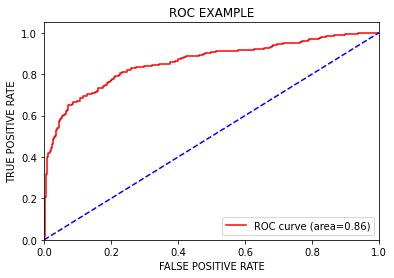

In [111]:
plt.figure()
plt.plot(fpr1,tpr1,color="red",label='ROC curve (area=%0.2f)'%roc_auc1)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.ylabel('TRUE POSITIVE RATE')
plt.xlabel('FALSE POSITIVE RATE')
plt.title('ROC EXAMPLE')
plt.legend(loc='lower right')
plt.show()

### ACCURACY CHECKING FOR DIFFERENT THRESHOLD VALUES


In [112]:
from sklearn.preprocessing import binarize

In [113]:
y_predict_train_class1=binarize(y_prob_train.reshape(1,-1),0.43)[0]# here 0.43 is a threshold value, you have to change this value as you want
y_predict_train_class1

C:\Users\shiwam\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.43 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [114]:
#CONVERTING THE ARRAY FROM FLOAT DATA TYPE TO INTEGER DATA TYPE

In [115]:
y_predict_train_class2=y_predict_train_class1.astype(int)
y_predict_train_class2

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,

In [116]:
#now confusion matrix becomes for 0.43 threshold value

In [117]:
confusion_matrix_2=confusion_matrix(y_train,y_predict_train_class2)
print(confusion_matrix_2)

[[449 100]
 [ 86 256]]


In [118]:
tn,fp,fn,tp=confusion_matrix(y_train,y_predict_train_class2).ravel()
print('TRUE NEGATIVE:',tn)
print('FALSE POSTIVE:',fp)
print('FALSE NEGATIVE:',fn)
print('TRUE POSITIVE:',tp)

TRUE NEGATIVE: 449
FALSE POSTIVE: 100
FALSE NEGATIVE: 86
TRUE POSITIVE: 256


In [119]:
#CLASSIFICATION REPORT WHEN THRESHOLF VALUE IS 0.43

In [120]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_predict_train_class2))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       549
           1       0.72      0.75      0.73       342

    accuracy                           0.79       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891



In [121]:
#NOW similarly CHANGE THE THRESHOLD VALUE AND SEE THE SENSITIVITY AND SPECIFICITY IN THE 'RECALL' COULMN 
#0->SPECIFICITY & 
#1->SENSITIVITY

### for calculating the optimal threshold value

In [122]:
from sklearn.metrics import roc_curve,auc

In [123]:
log_roc_auc=roc_auc_score(y_train,y_predict_train)
fpr,tpr,threshold=roc_curve(y_train,y_prob_train)
roc_auc=auc(fpr,tpr)
print('AREA UNDER THE ROC CURVE :%f'%roc_auc)

AREA UNDER THE ROC CURVE :0.857460


In [124]:
i= np.arange(len(tpr))
roc=pd.DataFrame({'fpr': pd.Series(fpr,index=i),
                 'tpr': pd.Series(tpr,index=i),
                 '1-fpr': pd.Series(1-fpr,index=i),
                 'tf': pd.Series(tpr-(1-fpr),index=i),
                  'thresholds':pd.Series(threshold,index=i)})
roc.iloc[(roc.tf - 0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
124,0.211293,0.789474,0.788707,0.000767,0.34732


### optimal threshold value is = 0.34732 which gives the highest accuracy of the model

In [125]:
#CHECKING THIS THREHOLD VALUE AND FIND OUT THE SENSITIVITY AND SPECIFICITY OF THE MODEL

In [126]:
y_predict_train_class_optimal=binarize(y_prob_train.reshape(1,-1),0.356748)[0]# here 0.35 is a threshold value, you have to change this value as you want
y_predict_train_class_optimal

C:\Users\shiwam\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.356748 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [127]:
y_predict_train_optimal2=y_predict_train_class_optimal.astype(int)
y_predict_train_optimal2

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,

In [128]:
confusion_matrix_3=confusion_matrix(y_train,y_predict_train_class_optimal)
print(confusion_matrix_3)

[[437 112]
 [ 76 266]]


In [129]:
tn,fp,fn,tp=confusion_matrix(y_train,y_predict_train_class_optimal).ravel()
print('TRUE NEGATIVE:',tn)
print('FALSE POSTIVE:',fp)
print('FALSE NEGATIVE:',fn)
print('TRUE POSITIVE:',tp)

TRUE NEGATIVE: 437
FALSE POSTIVE: 112
FALSE NEGATIVE: 76
TRUE POSITIVE: 266


In [130]:
print(classification_report(y_train,y_predict_train_class_optimal))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       549
           1       0.70      0.78      0.74       342

    accuracy                           0.79       891
   macro avg       0.78      0.79      0.78       891
weighted avg       0.79      0.79      0.79       891



### OPTIMAL THRESHOLD VALUE IN ROC CURVE

[Text(-50.0, 0, ''),
 Text(0.0, 0, ''),
 Text(50.0, 0, ''),
 Text(100.0, 0, ''),
 Text(150.0, 0, ''),
 Text(200.0, 0, ''),
 Text(250.0, 0, ''),
 Text(300.0, 0, '')]

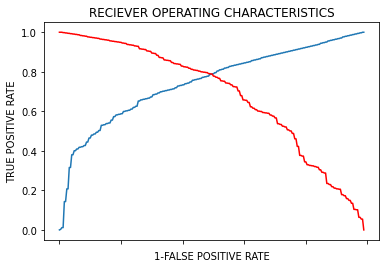

In [131]:
fig,ax=plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'],color='red')
plt.xlabel('1-FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('RECIEVER OPERATING CHARACTERISTICS')
ax.set_xticklabels([])

### here we see in the above graph. The intersection point is the optimal threshold value which is our 0.34732,here on this value we find the highest accuracy of the model

### now save the predicted value and its probability of test dataset as csv file

In [132]:
PassengerId=Model_test_data['PassengerId']

In [136]:
data=pd.DataFrame({'PassengerId': PassengerId,
                   'Survived':y_predict_test})
data

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [138]:
data.to_csv('TITANIC_SURVIVAL_PREDICTIONs.csv')